## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Merge two dataframes using a right join
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

print("Number of mice in dataframe: "+str(merge_df["Mouse ID"].nunique()))

Number of mice in dataframe: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = merge_df[merge_df.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf = merge_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = 'last').reset_index(drop = True)
cleandf
# determining the name of the file
file_name1 = 'fulldata.xlsx'
  
# saving the excel
cleandf.to_excel(file_name1)


In [9]:
# Checking the number of mice in the clean DataFrame.
print("Number of mice in dataframe: "+str(cleandf["Mouse ID"].nunique()))

Number of mice in dataframe: 249


## Summary Statistics

In [10]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#mean, median, variance, standard deviation, and SEM of the tumor volume. 
#Assemble the resulting series into a single summary dataframe.

tumor_mean = cleandf[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").mean().reset_index()
tumor_median = cleandf[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").median().reset_index()
tumor_variance = cleandf[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").var().reset_index()
tumor_stddev = cleandf[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").std().reset_index()
tumor_sem = cleandf[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").sem().reset_index()
tumor_summary1 = tumor_mean.merge(tumor_median,how='outer',on='Drug Regimen',suffixes=('_mean', '_median'))
tumor_summary2=tumor_summary1.merge(tumor_variance,how='outer',on='Drug Regimen')
tumor_summary2.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3)_variance'},inplace=True)
tumor_summary3=tumor_summary2.merge(tumor_stddev,how='outer',on='Drug Regimen')
tumor_summary3.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3)_stddev'},inplace=True)
tumor_summary_df=tumor_summary3.merge(tumor_sem,how='outer',on='Drug Regimen')
tumor_summary_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3)_sem'},inplace=True)
tumor_summary_df

,Drug Regimen,Tumor Volume (mm3)_mean,Tumor Volume (mm3)_median,Tumor Volume (mm3)_variance,Tumor Volume (mm3)_stddev,Tumor Volume (mm3)_sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = cleandf.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']}).reset_index()
summary_df


Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.382993  50.783528  43.220205  6.574208  0.526358
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Timepoints')

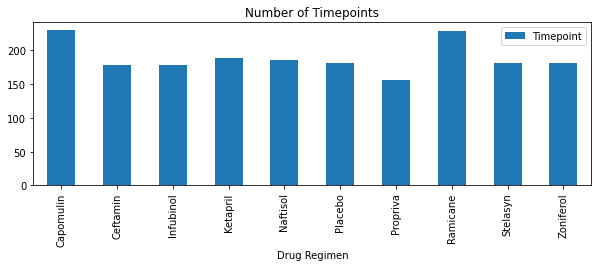

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

axis_prep = cleandf.groupby("Drug Regimen").count().reset_index()

x_axis = axis_prep["Drug Regimen"]
y_axis = axis_prep["Timepoint"]
pandas1 = pd.DataFrame({"Drug Regimen":axis_prep["Drug Regimen"],"Timepoint":axis_prep["Timepoint"]}).set_index("Drug Regimen")

# Use DataFrame.plot() in order to create a bar chart of the data
pandas1.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Number of Timepoints")




NameError: name 'tick_locations' is not defined

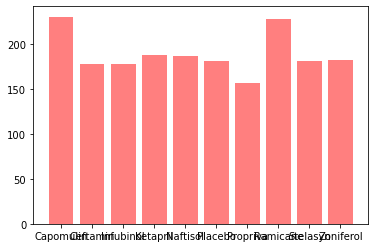

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.2)
plt.ylim(0, max(y_axis)+10)


<AxesSubplot:title={'center':'Points Scored by Team'}, ylabel='Timepoint'>

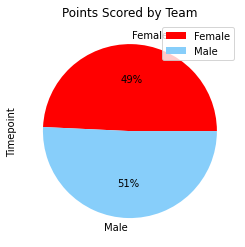

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_df = cleandf.groupby("Sex").count().reset_index()

# Labels for the sections of our pie chart
gender = gender_df["Sex"]

# The values of each section of the pie chart
gender_count = gender_df["Timepoint"]

# The colors of each section of the pie chart
colors = ["red", "lightskyblue"]

# plt.pie(gender_count, labels=gender, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# plt.axis("equal")

pandas2 = pd.DataFrame({"Gender":gender_df["Sex"],"Gender Count":gender_df["Timepoint"]}).set_index("Gender")

# Use DataFrame.plot() in order to create a bar chart of the data
# pandas1.plot(kind='pie', y=gender_count, autopct='%1.0f%%',colors = colors ,title='Count by Gender')
cleandf.groupby(["Sex"]).count().plot(kind='pie', y='Timepoint', autopct='%1.0f%%',
                                colors = colors,
                                title='Points Scored by Team')



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_count, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

# Filter for Drug Regimen
df = cleandf.loc[cleandf["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Group by Mouse ID and Drug Regimen
df.sort_values("Timepoint",ascending=False,inplace=True)

df.groupby(["Drug Regimen","Mouse ID","Timepoint"])


    
# df.sort_values("Timepoint",ascending=False,inplace=True)
df_summary = pd.DataFrame({"Drug Regimen":df["Drug Regimen"],"Mouse ID":df["Mouse ID"],"Timepoint":df["Timepoint"]})

df_summary.sort_values(["Drug Regimen","Mouse ID","Timepoint"],ascending=[True,True,False],inplace=True)
df_final=df_summary.drop_duplicates(["Drug Regimen","Mouse ID"])
# determining the name of the file
file_name = 'finaldata.xlsx'

  
# saving the excel
df_final.to_excel(file_name)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_summary=pd.merge(df_final,cleandf[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]],how='left',on=['Drug Regimen','Mouse ID','Timepoint'])
merge_summary.head(40)

/Users/MadhuSlokaPj/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
5,Capomulin,i557,45,47.685963
6,Capomulin,i738,45,37.311846
7,Capomulin,j119,45,38.125164
8,Capomulin,j246,35,38.753265
9,Capomulin,l509,45,41.483008


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
